In [1]:
import numpy as np

In [2]:
from scipy.special import comb as nchoosek
from scipy.special import softmax
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

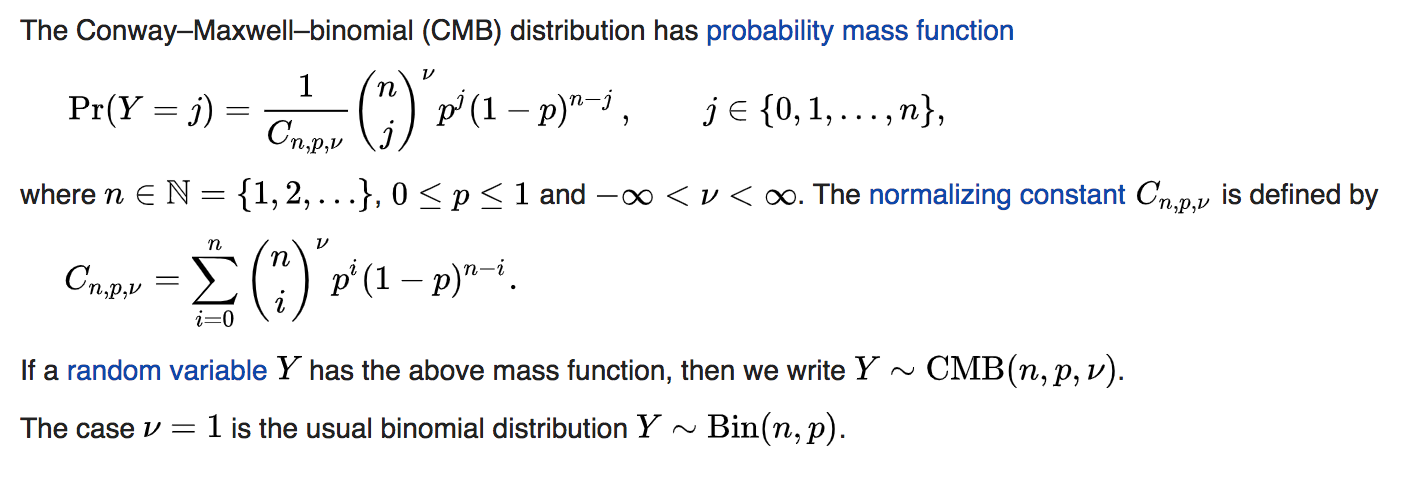

In [3]:
def log_pdf(n, p, v):
    vals = []
    for j in range(n):
        #prob_j = nchoosek(n, j)**v * (p**j)*((1-p)**(n-j))
        #vals.append(prob_j)
        term1 = v*np.log(nchoosek(n,j))
        term2 = j*np.log(p)
        term3 = (n-j)*np.log(1-p)
        vals.append(term1+term2+term3)
        
    return vals

In [4]:
#n = 10
#v = 1
#p = 0.9

def make_pdf(n, p, v):
    vals = []
    for j in range(n):
        prob_j = nchoosek(n, j)**v * (p**j)*((1-p)**(n-j))
        vals.append(prob_j)
    return vals
    
#plt.scatter( np.arange(0, n), vals)

In [5]:
log_pdf(n=10, p=0.5, v=1)

[-6.931471805599453,
 -4.628886712605407,
 -3.1248093158291335,
 -2.143980062817407,
 -1.5843642748819842,
 -1.4020427180880297,
 -1.5843642748819842,
 -2.143980062817407,
 -3.1248093158291335,
 -4.628886712605407]

## Play with the probablity distribution here

Text(0, 0.5, 'pr(y|x)')

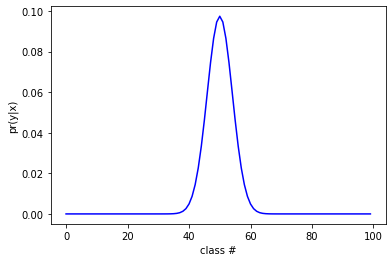

In [93]:
# v = the variance to control (anywhere between 0 and +inf)
# n = the number of classes
# pr = the mean (between 0 and 1)

pr = 0.5
v = 1.5
n = 100

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(0, n), 
            softmax(log_pdf(n=n, p=pr, v=v)), "b-")
ax.set_xlabel('class #')
ax.set_ylabel('pr(y|x)')

In [88]:
np.exp(-0.5)

0.6065306597126334

----------

## Let's implement this in PyTorch

In [8]:
import torch
from torch import nn
import torch.nn.functional as F

In [247]:
nchoosek(10,10)

/Users/cjb60/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  """Entry point for launching an IPython kernel.


1.0

In [58]:
class CMB(nn.Module):
    def __init__(self, n_in, n):
        """n_in = number of incoming units, n = number of classes"""
        super(CMB, self).__init__()
        self.n = n
        self.out = nn.Linear(n_in, 2)
        self.js = torch.arange(0, n).unsqueeze(0)
        self.nck = torch.zeros((1, n))
        for i in range(n):
            self.nck[:, i] = float(np.log(nchoosek(n, i)))
    
    def forward(self, x):
        out = self.out(x)
        pred_p, pred_v = torch.sigmoid(out[:,0]), torch.exp(out[:,1])
        pred_p = pred_p.repeat(1, self.n)
        pred_v = pred_v.repeat(1, self.n)
        # Compute the log pdf up to the normalising constant
        term1 = pred_v*self.nck
        term2 = self.js*torch.log(pred_p)
        term3 = (self.n-self.js)*torch.log(1-pred_p)        
        return F.softmax(term1+term2+term3)
        

In [59]:
layer = CMB(5, 100)

/Users/beckhamc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


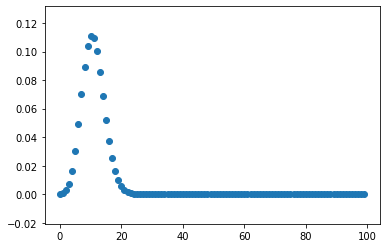

In [72]:
xfake = torch.zeros((1, 5)).float().normal_(0, 2)
plt.scatter( np.arange(0,100),
            layer(xfake).detach().numpy() )

--------